# CS 5683 - Big Data Analytics
## Assignment - 6: Graphs

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

### Assignment Total: 15 points (3% of final)

##### Use the network (edge list) 'Wiki-Vote.txt' given in Canvas

In [3]:
# NOTE: The data is given as an edgelist
# Meaning: each edge (node1,node2) in one line of the input file
input_data = 'Wiki-Vote.txt'

In [4]:
# Load the data as a directed graph (1 Point)
# Note-1: networkx read_edgelist will read the graph as undirected graph
# Note-2: you can convert this directed graph to an undirected graph wherever necessary in this assignment

graph = nx.read_edgelist(input_data,create_using=nx.DiGraph)
undirected_graph = graph.to_undirected()

##### Print the following basic properties of the given graph

In [5]:
# Print the number of nodes and edges in the graph here (2 Points)
print("Number of Nodes are",graph.number_of_nodes())
print("Number of Edges are",graph.number_of_edges())

Number of Nodes are 7115
Number of Edges are 103689


In [6]:
# Print the number of connected components here (1 Point)
# NOTE: There is a networkx package for this
print(nx.number_connected_components(undirected_graph))

24


In [9]:
# Print the number of nodes in each component here(1 Point)
count_component = 0
for component in list(nx.connected_components(undirected_graph)):
    count_component += 1
    print("For component:",count_component)
    print("              There are nodes:",len(component))

For component: 1
              There are nodes: 7066
For component: 2
              There are nodes: 2
For component: 3
              There are nodes: 2
For component: 4
              There are nodes: 2
For component: 5
              There are nodes: 2
For component: 6
              There are nodes: 2
For component: 7
              There are nodes: 2
For component: 8
              There are nodes: 2
For component: 9
              There are nodes: 2
For component: 10
              There are nodes: 2
For component: 11
              There are nodes: 2
For component: 12
              There are nodes: 2
For component: 13
              There are nodes: 2
For component: 14
              There are nodes: 2
For component: 15
              There are nodes: 2
For component: 16
              There are nodes: 3
For component: 17
              There are nodes: 2
For component: 18
              There are nodes: 2
For component: 19
              There are nodes: 3
For component: 20
              There

In [10]:
# Delete all nodes from components which have less than 10 nodes in the graph here (1 Point)
count_component = 0
for component in list(nx.connected_components(undirected_graph)):
    count_component += 1
    if(len(component)<10):
      for node in component:
        undirected_graph.remove_node(node)
print("Remaining component(s) are: ",nx.number_connected_components(undirected_graph))

Remaining component(s) are:  1


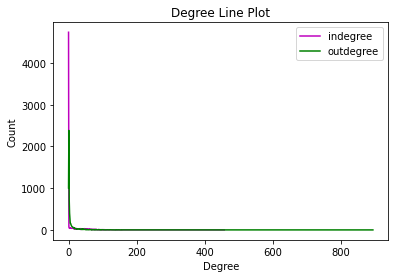

In [34]:
# Plot the degree distribution of the graph with a line graph here (5 Points)
# NOTE: You have to plot both in-degree and out-degree distribution in the same plot
# REFERENCE: https://networkx.org/documentation/networkx-2.3/auto_examples/drawing/plot_degree_histogram.html
# You have to get both in_degree and out_degree
# You have to use line plot instead of a histogram
import collections
import matplotlib.pyplot as plt
import networkx as nx


degree_sequence = sorted([d for n, d in graph.in_degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
fig, ax = plt.subplots()
plt.plot(deg, cnt, color="m",  label="indegree")

degree_sequence_out = sorted([d for n, d in graph.out_degree()], reverse=True)  # degree sequence
degreeCount_out = collections.Counter(degree_sequence_out)
outdeg, outcnt = zip(*degreeCount_out.items())
plt.plot(outdeg, outcnt, color="g",  label="outdegree")
plt.title("Degree Line Plot")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.legend(loc="upper right")

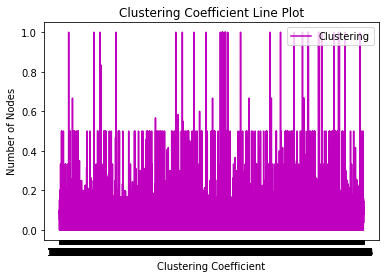

In [40]:
# Similar to the degree distribution, plot the clustering coefficient distribution of the graph 
#        with a line graph here (5 Points)
# NOTE: You can get the clustering coefficient of each node using the networkX function given below:
# REFERENCE: https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.clustering.html
# HOW TO PLOT THIS?
# STEP-1: Get clustering coefficient of each node
# STEP-2: Count the number of nodes with each clustering coefficient value
# STEP-3: Plot with clustering coefficient in x-axis and number of nodes in y-axis
# We do not need plot with clustering coefficient of both in_degree and out_degree
# Use line plot instead of histogram


import matplotlib.pyplot as plt
import networkx as nx


local_clustering_coefficient = nx.algorithms.cluster.clustering(graph)


lists = sorted(local_clustering_coefficient.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y, label = "Clustering",color="m") #line plot

plt.legend(loc="upper right")
plt.xlabel('Clustering Coefficient')
plt.ylabel('Number of Nodes')
plt.title('Clustering Coefficient Line Plot')
plt.show()

In [ ]:
# TIPS FOR YOUR PLOTS:
# Your plots must have the following
# x-axis name
# y-axis name
# plot title
# Legend, if there are multiple plots in a same plot